# Data

In [88]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [89]:
iris = fetch_ucirepo(id=53)

D1_X = iris.data.features.to_numpy()  # all features are floats without missing values
D1_y = iris.data.targets.to_numpy()  # class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virginica

scaler = MinMaxScaler()
D1_X = scaler.fit_transform(D1_X)

In [90]:
print(f'Features have NaN values: {np.isnan(D1_X).any()}')
print(f'Number of classes: {np.unique(D1_y).size}')

Features have NaN values: False
Number of classes: 3


In [91]:
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')

D2_y = wine_data['quality'].to_numpy().reshape(-1, 1)
D2_X = wine_data.drop('quality', axis=1).to_numpy()

scaler = MinMaxScaler()
D2_X = scaler.fit_transform(D2_X)

# Implementation of K-Nearest Neighbor (KNN)

## Splitting the Data

In [92]:
from sklearn.model_selection import train_test_split

D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_X, D1_y, test_size=0.3, random_state=420)

D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_X, D2_y, test_size=0.3, random_state=420)

# Optimization and Comparison of KNN

In [140]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Stores the training features X and training targets y.
        :param X: Training Features.
        :param y: Training Targets.
        :return: None.
        """
        self.X_train = X
        self.y_train = y

    def _get_k_neighbors_indices(self, q):
        """
        Determines the top k nearest neighbors for the given query.
        :param q: Query (Data Point).
        :return: Indices of Top k Nearest Neighbors.
        """
        # Very naive approach. We just calculate the distance to every training point and return the k closest ones. There are better methods like space-partitioning data structures or approximations like locality sensitive hashing. If I have enough time, maybe I will implement one of those.

        distances = {}
        for i, training_point in enumerate(self.X_train):
            distances[i] = self._distance(training_point, q)

        k_indices = sorted(distances, key=distances.get)[:self.k]

        return k_indices
        #k_nearest_neighbors = [self.X_train[i] for i in k_indices]
        #return k_nearest_neighbors

    @staticmethod
    def _distance(u, v):
        """
        Computes the euclidian distance between vectors u and v.
        :param u: Vector u
        :param v: Vector v
        :return: Euclidian distance between u and v
        """
        return np.sqrt(np.sum((u - v) ** 2))

    def predict(self, X):
        """
        Predicts the class labels for the given input features.
        :param X: Input features.
        :return: Predicted class labels.
        """
        y_predicted = np.full((X.shape[0], 1), None, dtype=object)

        if self.X_train is None or self.y_train is None:
            raise ValueError("You should call fit before predict")

        for i, test_point in enumerate(X):
            indices = self._get_k_neighbors_indices(test_point)

            class_count = {}

            for idx in indices:
                predicted_class = self.y_train[idx][0]

                if predicted_class not in class_count:
                    class_count[predicted_class] = 1
                else:
                    class_count[predicted_class] += 1

            best_class = max(class_count, key=class_count.get)
            y_predicted[i][0] = best_class

        return y_predicted

In [144]:
KNN = KNNClassifier(k=3)
KNN.fit(D1_X_train, D1_y_train)

y_pred = KNN.predict(D1_X_test)

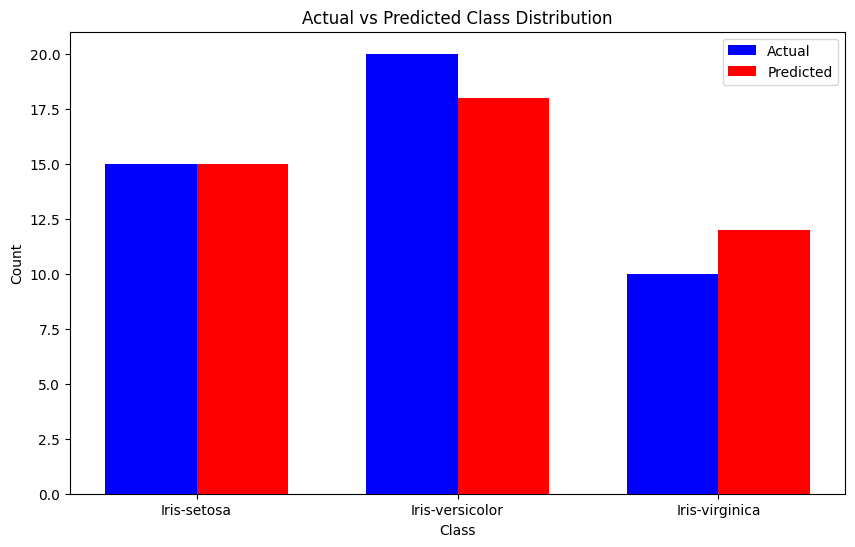

In [145]:
# Classes in the dataset
classes = np.unique(D1_y_test)

# Count of each class in the actual data
actual_counts = [np.sum(D1_y_test == c) for c in classes]
predicted_counts = [np.sum(y_pred == c) for c in classes]

# Bar plot
width = 0.35
x = np.arange(len(classes))

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, actual_counts, width=width, color='blue', label='Actual')
plt.bar(x + width / 2, predicted_counts, width=width, color='red', label='Predicted')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted Class Distribution')
plt.xticks(x, classes)
plt.legend()
plt.show()

In [114]:
print(D1_y_test)

[['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']]


In [115]:
print(y_pred)

[['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']
 ['I']]
